In this notebook we will analize the pickups patterns about Borough, NTAS, Day Hours, Day weeks and Month in the car service yellow taxi, green boro taxi and uber, acroos the years 2014 and 2015. 

In [1]:
import pandas as pd
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
yellow = pd.read_csv("data/yellow_nta3.csv")
yellow["pickup_datetime"] = pd.to_datetime(yellow["pickup_datetime"])
yellow["year"] = yellow["pickup_datetime"].map(lambda row: row.year)
yellow = yellow.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)

In [3]:
yellow14 = yellow[yellow.year == 2014]
yellow15 = yellow[yellow.year == 2015]

In [4]:
green = pd.read_csv("data/green_nta3.csv")
green["pickup_datetime"] = pd.to_datetime(green["pickup_datetime"])
green["year"] = green.pickup_datetime.map(lambda row: row.year)
green = green.drop(["Unnamed: 0","Unnamed: 0.1"],axis=1)

In [5]:
green14 = green[green.year == 2014]
green15 = green[green.year == 2015]

In [6]:
uber14 = pd.read_csv("data/uber_nta3_2014.csv")
uber14 = uber14.drop(["Unnamed: 0"],axis=1)
uber15 = pd.read_csv("data/uber_nta3_2015.csv")
uber15 = uber15.drop(["Unnamed: 0"],axis=1)

In [7]:
uber15.head()

,pickup_datetime,pickup_location_id,affiliate_base,pickup_borough,pickup_ntaname,service_zone,pickup_ntacode,geometry
0,2015-05-17 09:47:00,141,B02617,Manhattan,Lenox Hill West,Yellow Zone,MN31,POINT (-73.95508804893075 40.76496428316414)
1,2015-05-17 09:47:00,65,B02617,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,BK38,POINT (-73.98598668768781 40.6929272291251)
2,2015-05-17 09:47:00,100,B02617,Manhattan,Garment District,Yellow Zone,MN13,POINT (-73.99902072333019 40.74758546940266)
3,2015-05-17 09:47:00,80,B02774,Brooklyn,East Williamsburg,Boro Zone,BK90,POINT (-73.93679701804409 40.71536855281771)
4,2015-05-17 09:47:00,90,B02617,Manhattan,Flatiron,Yellow Zone,MN13,POINT (-73.99902072333019 40.74758546940266)


In [8]:
uber14boro = uber14.groupby("pickup_borough").count()
yellow14boro = yellow14.groupby("pickup_borough").count()
green14boro = green14.groupby("pickup_borough").count()

In [9]:
uber14boro

,pickup_datetime,pickup_latitude,pickup_longitude,base,geometry,pickup_ntacode,pickup_ntaname
pickup_borough,,,,,,,
Bronx,31584,31584,31584,31584,31584,31584,31584
Brooklyn,593594,593594,593594,593594,593594,593594,593594
Manhattan,3443458,3443458,3443458,3443458,3443458,3443458,3443458
NewJersey,92654,92654,92654,92654,92654,92654,92654
Queens,342225,342225,342225,342225,342225,342225,342225
Staten Island,1034,1034,1034,1034,1034,1034,1034


**Borough Comparison Between Car Services in 2014 and 2015**

Text(0.5, 1.0, 'Green 2014 pickup_borough')

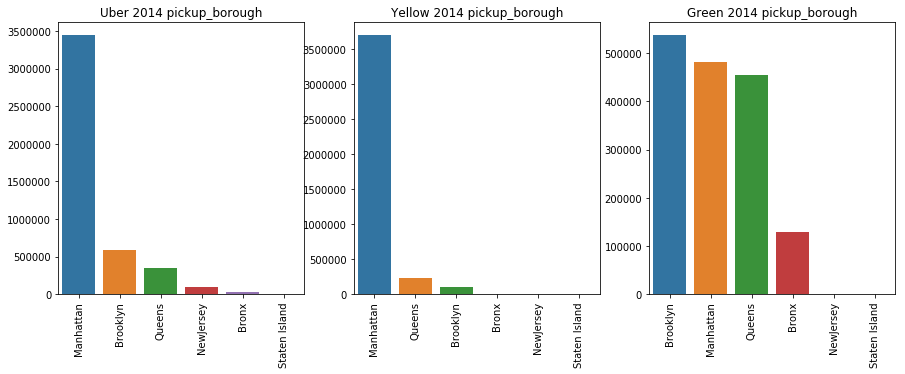

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=uber14["pickup_borough"].value_counts().index.values,
            y=uber14["pickup_borough"].value_counts().values)
plt.xticks(rotation=90)
plt.title("Uber 2014 pickup_borough")

plt.subplot(1,3,2)
sns.barplot(x=yellow14["pickup_borough"].value_counts().index.values,
            y=yellow14["pickup_borough"].value_counts().values)
plt.xticks(rotation=90)
plt.title("Yellow 2014 pickup_borough")

plt.subplot(1,3,3)
sns.barplot(x=green14["pickup_borough"].value_counts().index.values,
            y=green14["pickup_borough"].value_counts().values)
plt.xticks(rotation=90)
plt.title("Green 2014 pickup_borough")

In 2014 we observed a competition between the uber and yellow services, having Manhattan as its main activity center, where the yellow service has some more services than uber, while uber exceeds it in the other boroughs.

Text(0.5, 1.0, 'Green 2015 pickup_borough')

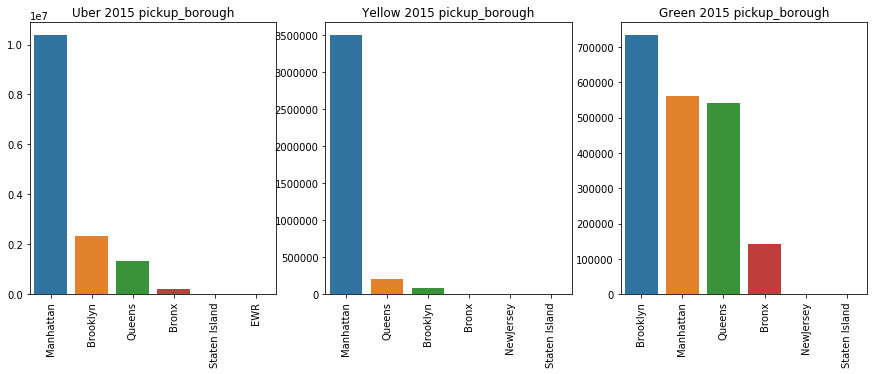

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=uber15["pickup_borough"].value_counts().index.values,
            y=uber15["pickup_borough"].value_counts().values)
plt.xticks(rotation=90)
plt.title("Uber 2015 pickup_borough")

plt.subplot(1,3,2)
sns.barplot(x=yellow15["pickup_borough"].value_counts().index.values,
            y=yellow15["pickup_borough"].value_counts().values)
plt.xticks(rotation=90)
plt.title("Yellow 2015 pickup_borough")

plt.subplot(1,3,3)
sns.barplot(x=green15["pickup_borough"].value_counts().index.values,
            y=green15["pickup_borough"].value_counts().values)
plt.xticks(rotation=90)
plt.title("Green 2015 pickup_borough")

The behavior in 2015 remains the same in 2014 in the three services, what is striking is that while the yellow service continues with the same services in Manhattan, uber has managed to increase its services by more than double, going from less than 350 thousand services to more than 1 million, plus it increased its services in the other boroughs.
The green service also improved its activity in Brooklyn, Manhattan, and Queens

**NTA Comparison Between Car Services in 2014 and 2015**

Text(0.5, 1.0, 'Green 2014 top 5 NTA pickup')

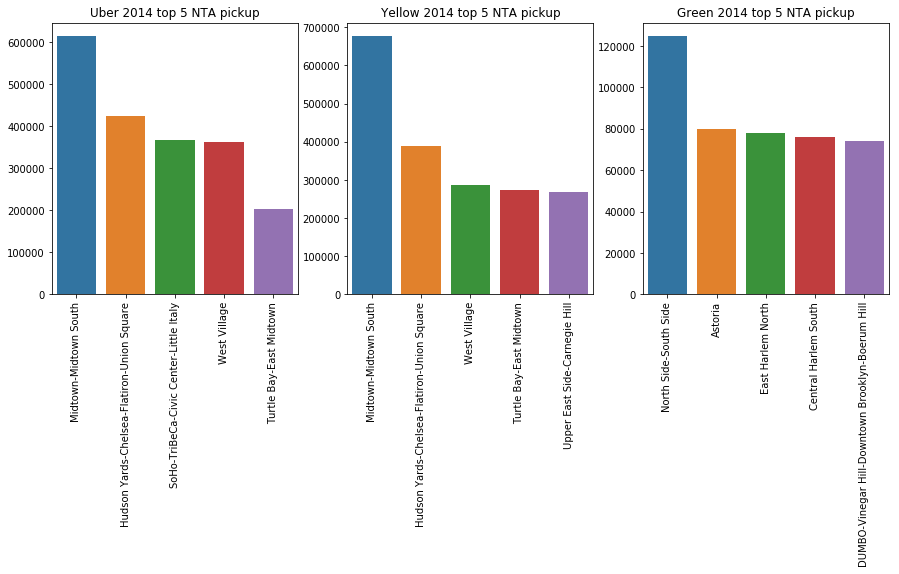

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=uber14["pickup_ntaname"].value_counts()[:5].index.values,
            y=uber14["pickup_ntaname"].value_counts()[:5].values)
plt.xticks(rotation=90)
plt.title("Uber 2014 top 5 NTA pickup")

plt.subplot(1,3,2)
sns.barplot(x=yellow14["pickup_ntaname"].value_counts()[:5].index.values,
            y=yellow14["pickup_ntaname"].value_counts()[:5].values)
plt.xticks(rotation=90)
plt.title("Yellow 2014 top 5 NTA pickup")

plt.subplot(1,3,3)
sns.barplot(x=green14["pickup_ntaname"].value_counts()[:5].index.values,
            y=green14["pickup_ntaname"].value_counts()[:5].values)
plt.xticks(rotation=90)
plt.title("Green 2014 top 5 NTA pickup")

Text(0.5, 1.0, 'Green 2015 top 5 NTA pickup')

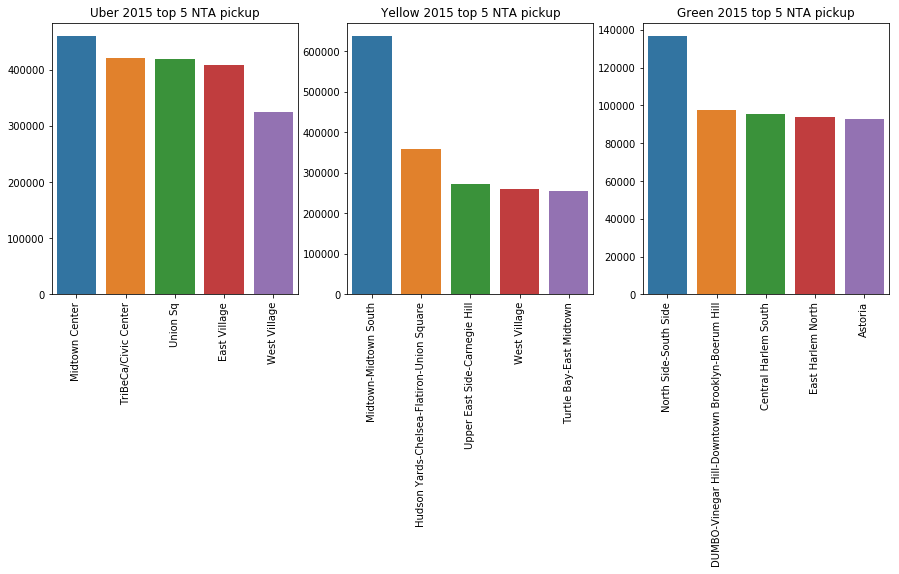

In [13]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.barplot(x=uber15["pickup_ntaname"].value_counts()[:5].index.values,
            y=uber15["pickup_ntaname"].value_counts()[:5].values)
plt.xticks(rotation=90)
plt.title("Uber 2015 top 5 NTA pickup")

plt.subplot(1,3,2)
sns.barplot(x=yellow15["pickup_ntaname"].value_counts()[:5].index.values,
            y=yellow15["pickup_ntaname"].value_counts()[:5].values)
plt.xticks(rotation=90)
plt.title("Yellow 2015 top 5 NTA pickup")

plt.subplot(1,3,3)
sns.barplot(x=green15["pickup_ntaname"].value_counts()[:5].index.values,
            y=green15["pickup_ntaname"].value_counts()[:5].values)
plt.xticks(rotation=90)
plt.title("Green 2015 top 5 NTA pickup")

There was greater equality in the NTAs of the yellow and uber services in 2014, 2015 shows that uber is looking for new points, or the dynamics of the business led him to change his pickup points, while the yellow service continued with the same points.

Uber has competed directly with the yellow service, while the green service has its own domains. What is evident is that uber has lowered the tendency to collect in only NTAs and diversifies through several NTAs to capture more services. This flexibility in the collection that uber has is what gives it the great advantage over its competitors.